In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [47]:
df=pd.read_csv("Group_13_data_cleaned.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


# For Nox as target variable 

In [43]:

# select the only NOX as target variabel
nox_df = df.copy()
nox_df = nox_df.drop("CO", axis = 1) # drop the target variable CO

In [44]:
nox_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,82.028
...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,64.738


In [45]:
# split the data for training and test using sklearn train_test_split function 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

# split the data 
X = nox_df.iloc[:, :-1]
y = nox_df["NOX"]

In [6]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, X_valid.shape

((22039, 9), (7347, 9), (7347, 9))

In [7]:
X_train.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
AT,1.000000,-0.407217,-0.479427,0.264044,0.049556,0.186205,0.214722,-0.086741,0.018999
AP,-0.407217,1.000000,-0.018856,-0.038360,0.060868,-0.001211,-0.188975,0.119721,0.104228
AH,-0.479427,-0.018856,1.000000,-0.159022,-0.239925,-0.227119,0.058954,-0.141427,-0.200900
AFDP,0.264044,-0.038360,-0.159022,1.000000,0.676935,0.698622,-0.455780,0.664135,0.701644
GTEP,0.049556,0.060868,-0.239925,0.676935,1.000000,0.879490,-0.698528,0.964712,0.978969
TIT,0.186205,-0.001211,-0.227119,0.698622,0.879490,1.000000,-0.396838,0.913837,0.912952
TAT,0.214722,-0.188975,0.058954,-0.455780,-0.698528,-0.396838,1.000000,-0.669779,-0.700126
TEY,-0.086741,0.119721,-0.141427,0.664135,0.964712,0.913837,-0.669779,1.000000,0.988866
CDP,0.018999,0.104228,-0.200900,0.701644,0.978969,0.912952,-0.700126,0.988866,1.000000


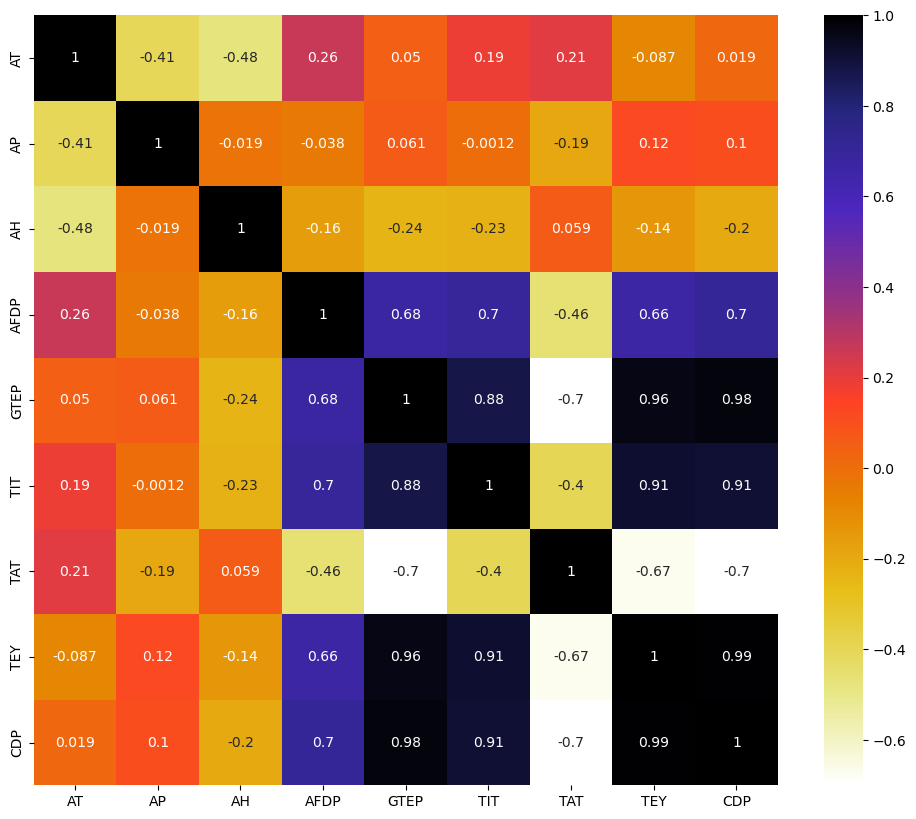

In [8]:

import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [9]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [10]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))


3

In [11]:

corr_features

{'CDP', 'TEY', 'TIT'}

In [12]:

X = X_train.drop(corr_features,axis=1)
#X_test.drop(corr_features,axis=1)


In [13]:
X.head()

,AT,AP,AH,AFDP,GTEP,TAT
20388,23.4010,1009.7,93.618,4.5376,21.878,550.13
34312,25.9360,1008.4,60.936,4.5812,30.200,544.85
23351,9.2324,1016.3,81.109,4.5589,33.181,536.74
15214,2.7801,1020.0,68.901,4.1692,35.047,536.74
3943,18.9290,1010.2,89.698,3.1067,20.010,550.03


In [14]:
# normalize the X and y. As we removed Outliers in Part1 we are not going to Standardize instead we are performing normalizing 
X = nox_df = Normalizer().fit_transform(X)

# Best model from part 2 with selected variables  is Random forest

In [15]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state =0)
model = model.fit(X, y_train)

In [16]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
y_train_pred = model.predict(X)
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("MAE on train set:", round (mae, 3))
print("MSE on train set is:", round(mse, 3))
print(f"RMSE on the train set: {np.sqrt(mse)}")

MAE on train set: 1.259
MSE on train set is: 3.824
RMSE on the train set: 1.9554041165583707


In [27]:
Tx = X_test.drop(corr_features,axis=1)
Tx.shape

(7347, 6)

In [29]:
Tx.shape, y_test.shape

((7347, 6), (7347,))

In [31]:
# TEST SET
y_test_pred = model.predict(Tx)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print("MAE on test set:", round (mae, 3))
print("MSE on test set is:", round(mse, 3))
print(f"RMSE on the test set: {np.sqrt(mse)}")

MAE on test set: 8.942
MSE on test set is: 133.11
RMSE on the test set: 11.537316531790667


C:\Users\12142\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


# Best model from part 3 with selected variables is SVM  linear

In [36]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear', C=1)
regressor.fit(X, y_train)

SVR(C=1, kernel='linear')

In [37]:
y_tr_pred = regressor.predict(X)
mae = mean_absolute_error(y_train, y_tr_pred)
mse = mean_squared_error(y_train, y_tr_pred)
rmse = mean_squared_error(y_train, y_tr_pred, squared=False)
print("MAE on train set:", round (mae, 3))
print("MSE on train set is:", round(mse, 3))
print(f"RMSE on the train set: {np.sqrt(mse)}")


MAE on train set: 8.645
MSE on train set is: 134.55
RMSE on the train set: 11.599566416446619


In [40]:
# TEST SET
from sklearn.metrics import mean_squared_error,r2_score
y_test_pred = regressor.predict(Tx)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print("MAE on test set:", round (mae, 3))
print("MSE on test set is:", round(mse, 3))
print(f"RMSE on the test set: {np.sqrt(mse)}")
r2_score(y_test, y_test_pred)

C:\Users\12142\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


MAE on test set: 527.445
MSE on test set is: 409594.987
RMSE on the test set: 639.9960834114007


-3089.9139183643424

## For CO as target variable 

In [48]:
# For CO as target variable 
co_df = df.copy()
co_df = co_df.drop("NOX", axis = 1) # drop the target variable NOX

In [49]:
co_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747
...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340


In [50]:
# split the data for training and test using sklearn train_test_split function 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

# split the data 
X = co_df.iloc[:, :-1]
y = co_df["CO"]

In [51]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, X_valid.shape

((22039, 9), (7347, 9), (7347, 9))

In [52]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910
...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771


In [53]:
X_train.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
AT,1.000000,-0.407217,-0.479427,0.264044,0.049556,0.186205,0.214722,-0.086741,0.018999
AP,-0.407217,1.000000,-0.018856,-0.038360,0.060868,-0.001211,-0.188975,0.119721,0.104228
AH,-0.479427,-0.018856,1.000000,-0.159022,-0.239925,-0.227119,0.058954,-0.141427,-0.200900
AFDP,0.264044,-0.038360,-0.159022,1.000000,0.676935,0.698622,-0.455780,0.664135,0.701644
GTEP,0.049556,0.060868,-0.239925,0.676935,1.000000,0.879490,-0.698528,0.964712,0.978969
TIT,0.186205,-0.001211,-0.227119,0.698622,0.879490,1.000000,-0.396838,0.913837,0.912952
TAT,0.214722,-0.188975,0.058954,-0.455780,-0.698528,-0.396838,1.000000,-0.669779,-0.700126
TEY,-0.086741,0.119721,-0.141427,0.664135,0.964712,0.913837,-0.669779,1.000000,0.988866
CDP,0.018999,0.104228,-0.200900,0.701644,0.978969,0.912952,-0.700126,0.988866,1.000000


In [54]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [55]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

3

In [56]:

corr_features

{'CDP', 'TEY', 'TIT'}

In [57]:
X = X_train.drop(corr_features,axis=1)
#X_test.drop(corr_features,axis=1)


In [58]:
X

,AT,AP,AH,AFDP,GTEP,TAT
20388,23.4010,1009.7,93.618,4.5376,21.878,550.13
34312,25.9360,1008.4,60.936,4.5812,30.200,544.85
23351,9.2324,1016.3,81.109,4.5589,33.181,536.74
15214,2.7801,1020.0,68.901,4.1692,35.047,536.74
3943,18.9290,1010.2,89.698,3.1067,20.010,550.03
...,...,...,...,...,...,...
1308,8.9929,1028.1,71.983,5.4711,33.150,536.74
8659,8.5787,1025.5,84.621,3.9353,19.725,541.31
24892,21.5890,1015.1,65.003,3.9177,26.036,550.20
33122,17.7270,1012.0,76.098,4.3293,31.028,540.75


In [59]:
# normalize the X and y. As we removed Outliers in Part1 we are not going to Standardize instead we are performing normalizing 
X = nox_df = Normalizer().fit_transform(X)

# Best model from part 2 with selected variables  is Random forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state =0)
model = model.fit(X, y_train)

In [61]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
y_train_pred = model.predict(X)
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("MAE on train set:", round (mae, 3))
print("MSE on train set is:", round(mse, 3))
print(f"RMSE on the train set: {np.sqrt(mse)}")

MAE on train set: 0.216
MSE on train set is: 0.234
RMSE on the train set: 0.4839664252095693


In [62]:
Tx2 = X_test.drop(corr_features,axis=1)
Tx2.shape

(7347, 6)

In [63]:
Tx2.shape, y_test.shape

((7347, 6), (7347,))

In [64]:
# TEST SET
y_test_pred = model.predict(Tx2)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print("MAE on test set:", round (mae, 3))
print("MSE on test set is:", round(mse, 3))
print(f"RMSE on the test set: {np.sqrt(mse)}")

MAE on test set: 2.249
MSE on test set is: 7.731
RMSE on the test set: 2.780428070403233


C:\Users\12142\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


# Best model from part 3 with selected variables is SVM  linear

In [33]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear', C=10)
regressor.fit(X, y_train)

SVR(C=10, kernel='linear')

In [34]:
y_train_pred = regressor.predict(X)
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("MAE on train set:", round (mae, 3))
print("MSE on train set is:", round(mse, 3))
print(f"RMSE on the train set: {np.sqrt(mse)}")


MAE on train set: 1.074
MSE on train set is: 4.237
RMSE on the train set: 2.058502609725401
